<a href="https://colab.research.google.com/github/Zandersan/portifolio/blob/ml_study/matriz_confusao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# # Matriz de Confusão Complexa
#
# Este notebook gera e analisa uma matriz de confusão complexa com múltiplas classes.

In [2]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# ## Gerando a Matriz de Confusão Complexa

# %%
# Definindo a matriz de confusão baseada no exemplo fornecido
conf_matrix = np.array([
    [0.99, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],  # Classe 1
    [0.00, 0.98, 0.01, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.00],  # Classe 2
    [0.00, 0.00, 1.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00],  # Classe 3
    [0.00, 0.00, 0.00, 0.99, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01],  # Classe 4
    [0.00, 0.00, 0.02, 0.00, 0.98, 0.00, 0.00, 0.00, 0.00, 0.00],  # Classe 5
    [0.01, 0.00, 0.00, 0.00, 0.00, 0.99, 0.00, 0.00, 0.00, 0.00],  # Classe 6
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00, 0.00, 0.00, 0.00],  # Classe 7
    [0.00, 0.00, 0.01, 0.00, 0.00, 0.00, 0.00, 0.99, 0.00, 0.00],  # Classe 8
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.01, 0.00, 0.98, 0.00],  # Classe 9
    [0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 1.00]   # Classe 10
])

# Nomes das classes
classes = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

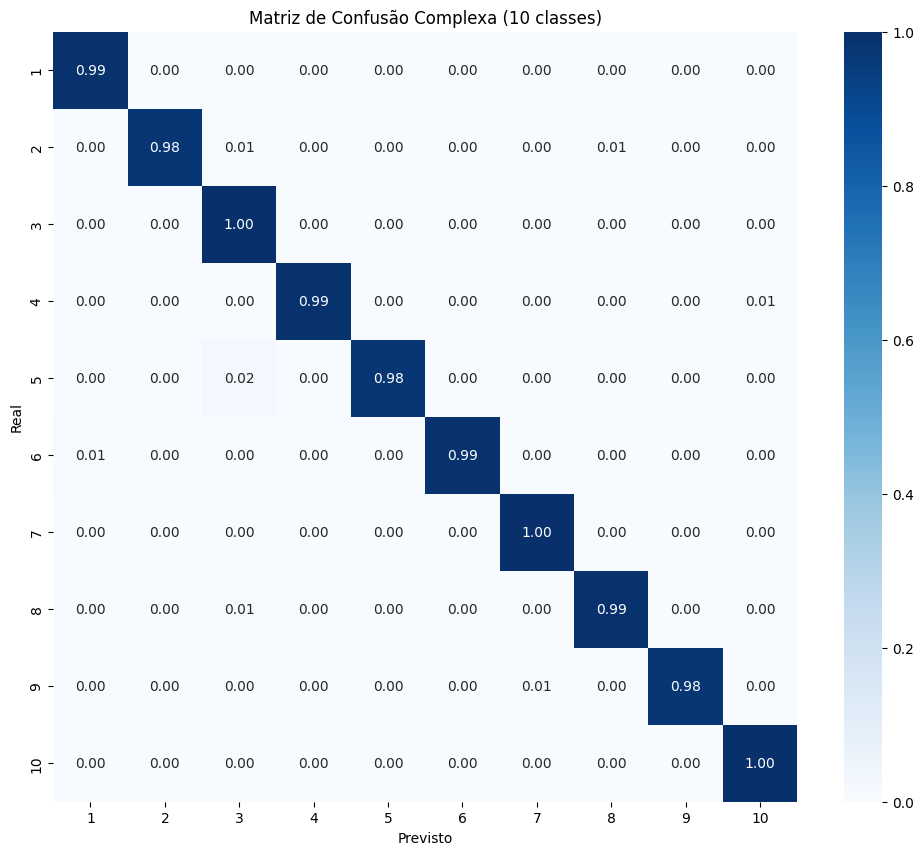

In [4]:
# ## Visualização da Matriz de Confusão

# %%
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=classes, yticklabels=classes,
            vmin=0, vmax=1)
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão Complexa (10 classes)')
plt.show()

In [5]:
# ## Análise por Classe

# %%
# Criando dataframe com métricas por classe
metrics_per_class = []

for i in range(10):
    TP = conf_matrix[i,i]
    FP = np.sum(conf_matrix[:,i]) - TP
    FN = np.sum(conf_matrix[i,:]) - TP
    TN = np.sum(conf_matrix) - TP - FP - FN

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    accuracy = (TP + TN) / np.sum(conf_matrix)

    metrics_per_class.append({
        'Classe': classes[i],
        'Precisão': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Acurácia': accuracy
    })

metrics_df = pd.DataFrame(metrics_per_class)
metrics_df.style.format({
    'Precisão': '{:.2%}',
    'Recall': '{:.2%}',
    'F1-Score': '{:.2%}',
    'Acurácia': '{:.2%}'
})

,Classe,Precisão,Recall,F1-Score,Acurácia
0,1,99.00%,100.00%,99.50%,99.90%
1,2,100.00%,98.00%,98.99%,99.80%
2,3,96.15%,100.00%,98.04%,99.60%
3,4,100.00%,99.00%,99.50%,99.90%
4,5,100.00%,98.00%,98.99%,99.80%
5,6,100.00%,99.00%,99.50%,99.90%
6,7,99.01%,100.00%,99.50%,99.90%
7,8,99.00%,99.00%,99.00%,99.80%
8,9,100.00%,98.99%,99.49%,99.90%
9,10,99.01%,100.00%,99.50%,99.90%


In [6]:
# ## Métricas Globais

# %%
# Calculando métricas globais
total_TP = np.trace(conf_matrix)
total_FP = np.sum(conf_matrix) - total_TP
total_FN = np.sum(conf_matrix) - total_TP
total_TN = np.sum(conf_matrix) * (len(classes)-1) - total_FP

macro_precision = metrics_df['Precisão'].mean()
macro_recall = metrics_df['Recall'].mean()
macro_f1 = metrics_df['F1-Score'].mean()
accuracy = total_TP / np.sum(conf_matrix)

print(f"Acurácia Global: {accuracy:.2%}")
print(f"Precisão Média (Macro): {macro_precision:.2%}")
print(f"Recall Médio (Macro): {macro_recall:.2%}")
print(f"F1-Score Médio (Macro): {macro_f1:.2%}")

Acurácia Global: 99.20%
Precisão Média (Macro): 99.22%
Recall Médio (Macro): 99.20%
F1-Score Médio (Macro): 99.20%


In [7]:
# ## Análise dos Erros Mais Comuns

# %%
# Encontrando os pares de classes com maior confusão
confusion_pairs = []
for i in range(10):
    for j in range(10):
        if i != j and conf_matrix[i,j] > 0:
            confusion_pairs.append({
                'Classe Real': classes[i],
                'Classe Predita': classes[j],
                'Frequência': conf_matrix[i,j]
            })

confusion_df = pd.DataFrame(confusion_pairs).sort_values('Frequência', ascending=False)
print("\nPrincipais erros de classificação:")
display(confusion_df)


Principais erros de classificação:


,Classe Real,Classe Predita,Frequência
3,5,3,0.02
1,2,8,0.01
0,2,3,0.01
2,4,10,0.01
4,6,1,0.01
5,8,3,0.01
6,9,7,0.01
